In [2]:
import pandas as pd

df = pd.read_csv("data.csv", index_col=0)
df.index = pd.to_datetime(df.index)
Energia = df['Energia'].resample('1d').sum()
df = df.resample('1d').mean()
df['Energia'] = Energia
df.rename(columns={ df.columns[1]: "Temp_zewn" }, inplace=True)
df.rename(columns={ df.columns[2]: "V_wiatru" }, inplace=True)
df.rename(columns={ df.columns[3]: "Wilg" }, inplace=True)
df.rename(columns={ df.columns[5]: "Dlug_dnia" }, inplace=True)
df.rename(columns={ df.columns[6]: "Typ_dnia" }, inplace=True)
df.rename(columns={ df.columns[7]: "Pora_roku" }, inplace=True)
df.head()

,Energia,Temp_zewn,V_wiatru,Wilg,Zachm,Dlug_dnia,Typ_dnia,Pora_roku
Data czas,,,,,,,,
2016-01-01,93506.054,-3.691304,3.260870,78.565217,7.304348,7.433,5.0,4.0
2016-01-02,112776.240,-9.341667,4.416667,70.083333,1.416667,7.483,3.0,4.0
2016-01-03,122962.116,-11.200000,3.708333,68.458333,0.041667,7.500,4.0,4.0
2016-01-04,125575.794,-9.908333,3.750000,55.125000,0.000000,7.517,1.0,4.0
2016-01-05,131745.917,-10.616667,1.916667,61.916667,1.333333,7.550,1.0,4.0


In [3]:
df_day_info = df[['Dlug_dnia', 'Typ_dnia', 'Pora_roku']].copy()
df_day_info.head()

,Dlug_dnia,Typ_dnia,Pora_roku
Data czas,,,
2016-01-01,7.433,5.0,4.0
2016-01-02,7.483,3.0,4.0
2016-01-03,7.500,4.0,4.0
2016-01-04,7.517,1.0,4.0
2016-01-05,7.550,1.0,4.0


In [4]:
df.drop(columns=['Dlug_dnia', 'Typ_dnia', 'Pora_roku'], inplace=True)
df.head()

,Energia,Temp_zewn,V_wiatru,Wilg,Zachm
Data czas,,,,,
2016-01-01,93506.054,-3.691304,3.260870,78.565217,7.304348
2016-01-02,112776.240,-9.341667,4.416667,70.083333,1.416667
2016-01-03,122962.116,-11.200000,3.708333,68.458333,0.041667
2016-01-04,125575.794,-9.908333,3.750000,55.125000,0.000000
2016-01-05,131745.917,-10.616667,1.916667,61.916667,1.333333


/home/stas/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


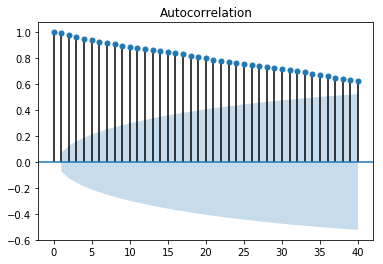

In [6]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df['Energia'], lags=40).show()

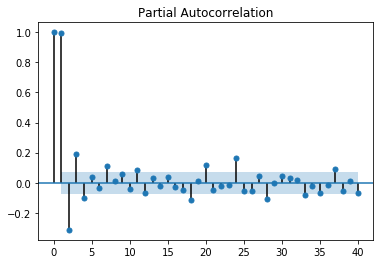

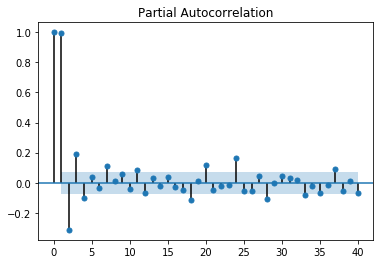

In [7]:
sm.graphics.tsa.plot_pacf(df['Energia'], lags=40)

In [1]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(df.columns[j] + '(t-{})'.format(i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(df.columns[j] + '(t)') for j in range(n_vars)]
        else:
            names += [(df.columns[j] + '(t+{})'.format(i)) for j in range(n_vars)]

    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [8]:
pd_lag = series_to_supervised(df, 3)
pd_lag.head()

,Energia(t-3),Temp_zewn(t-3),V_wiatru(t-3),Wilg(t-3),Zachm(t-3),Energia(t-2),Temp_zewn(t-2),V_wiatru(t-2),Wilg(t-2),Zachm(t-2),Energia(t-1),Temp_zewn(t-1),V_wiatru(t-1),Wilg(t-1),Zachm(t-1),Energia(t),Temp_zewn(t),V_wiatru(t),Wilg(t),Zachm(t)
Data czas,,,,,,,,,,,,,,,,,,,,
2016-01-04,93506.054,-3.691304,3.260870,78.565217,7.304348,112776.240,-9.341667,4.416667,70.083333,1.416667,122962.116,-11.200000,3.708333,68.458333,0.041667,125575.794,-9.908333,3.750000,55.125000,0.000000
2016-01-05,112776.240,-9.341667,4.416667,70.083333,1.416667,122962.116,-11.200000,3.708333,68.458333,0.041667,125575.794,-9.908333,3.750000,55.125000,0.000000,131745.917,-10.616667,1.916667,61.916667,1.333333
2016-01-06,122962.116,-11.200000,3.708333,68.458333,0.041667,125575.794,-9.908333,3.750000,55.125000,0.000000,131745.917,-10.616667,1.916667,61.916667,1.333333,135885.442,-11.320833,1.583333,77.583333,0.125000
2016-01-07,125575.794,-9.908333,3.750000,55.125000,0.000000,131745.917,-10.616667,1.916667,61.916667,1.333333,135885.442,-11.320833,1.583333,77.583333,0.125000,129980.459,-7.220833,2.791667,69.541667,5.916667
2016-01-08,131745.917,-10.616667,1.916667,61.916667,1.333333,135885.442,-11.320833,1.583333,77.583333,0.125000,129980.459,-7.220833,2.791667,69.541667,5.916667,113582.531,-1.837500,3.916667,90.416667,7.958333


In [9]:
frames = [pd_lag, df_day_info]
df = pd.concat(frames, axis=1, join='inner')
df.head()

,Energia(t-3),Temp_zewn(t-3),V_wiatru(t-3),Wilg(t-3),Zachm(t-3),Energia(t-2),Temp_zewn(t-2),V_wiatru(t-2),Wilg(t-2),Zachm(t-2),...,Wilg(t-1),Zachm(t-1),Energia(t),Temp_zewn(t),V_wiatru(t),Wilg(t),Zachm(t),Dlug_dnia,Typ_dnia,Pora_roku
Data czas,,,,,,,,,,,,,,,,,,,,,
2016-01-04,93506.054,-3.691304,3.260870,78.565217,7.304348,112776.240,-9.341667,4.416667,70.083333,1.416667,...,68.458333,0.041667,125575.794,-9.908333,3.750000,55.125000,0.000000,7.517,1.0,4.0
2016-01-05,112776.240,-9.341667,4.416667,70.083333,1.416667,122962.116,-11.200000,3.708333,68.458333,0.041667,...,55.125000,0.000000,131745.917,-10.616667,1.916667,61.916667,1.333333,7.550,1.0,4.0
2016-01-06,122962.116,-11.200000,3.708333,68.458333,0.041667,125575.794,-9.908333,3.750000,55.125000,0.000000,...,61.916667,1.333333,135885.442,-11.320833,1.583333,77.583333,0.125000,7.583,5.0,4.0
2016-01-07,125575.794,-9.908333,3.750000,55.125000,0.000000,131745.917,-10.616667,1.916667,61.916667,1.333333,...,77.583333,0.125000,129980.459,-7.220833,2.791667,69.541667,5.916667,7.600,1.0,4.0
2016-01-08,131745.917,-10.616667,1.916667,61.916667,1.333333,135885.442,-11.320833,1.583333,77.583333,0.125000,...,69.541667,5.916667,113582.531,-1.837500,3.916667,90.416667,7.958333,7.650,2.0,4.0


In [10]:
df.to_csv('3dni_pogoda.csv')